## Corey Solitaire
### advancecd_dataframes
#### 8/14/2020

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(12, 6))
from pydataset import data

In [25]:
"""
Test for SQL import and env.py
"""
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [26]:
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [27]:
# Big Test, that Passed...

pd.read_sql("""
SELECT CONCAT(employees.first_name, " ", employees.last_name) AS "Employee Name", departments.dept_name AS "Department Name", manager_name AS "Manager Name"
FROM employees
    JOIN dept_emp
        ON employees.emp_no = dept_emp.emp_no
    JOIN departments
        ON dept_emp.dept_no = departments.dept_no
    JOIN dept_manager
        ON dept_manager.dept_no = dept_emp.dept_no
-- The following subquery is a table that connects the current department manager name to their emp_no and its alias is manager_names

    JOIN(
        SELECT employees.emp_no, CONCAT(employees.first_name, " ", employees.last_name) AS manager_name
            FROM employees
                JOIN dept_manager
                    ON employees.emp_no = dept_manager.emp_no AND dept_manager.to_date > curdate()
    ) AS manager_names
WHERE dept_manager.to_date > curdate()
    AND dept_emp.to_date > curdate()
    AND dept_manager.emp_no = manager_names.emp_no;""", url)

,Employee Name,Department Name,Manager Name
0,Cristinel Bouloucos,Marketing,Vishwani Minakawa
1,Berhard McFarlin,Marketing,Vishwani Minakawa
2,Yucel Auria,Marketing,Vishwani Minakawa
3,Karoline Cesareni,Marketing,Vishwani Minakawa
4,Nikolaos Llado,Marketing,Vishwani Minakawa
...,...,...,...
240119,Aloke Wuwongse,Customer Service,Yuchang Weedman
240120,Masako Angiulli,Customer Service,Yuchang Weedman
240121,Chuanti Riesenhuber,Customer Service,Yuchang Weedman
240122,Ronghao Morrow,Customer Service,Yuchang Weedman


# Advanced Dataframes Exercises

In [28]:
"""
mpg = data('mpg') # load the dataset and store it in a variable
# data('mpg', show_doc=True) # view the documentation for the dataset
"""

"\nmpg = data('mpg') # load the dataset and store it in a variable\n# data('mpg', show_doc=True) # view the documentation for the dataset\n"

### 1. Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

In [29]:
mpg_df = data('mpg')
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [30]:
# On average, which manufacturer has the best miles per gallon

mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [31]:
mpg_df = mpg_df.assign(avg_mpg = (mpg_df.cty + mpg_df.hwy) /2)
mpg_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [32]:
mpg_df.sort_values(by=['avg_mpg', 'manufacturer'], ascending = False)


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,39.5
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,38.5
223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,35.0
197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,32.5
196,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...
127,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,10.5
55,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,10.5
60,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,10.5
66,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,10.5


In [33]:
# How many different manufacturers are there?

len(mpg_df.groupby('manufacturer'))


15

In [34]:
# How many different models are there?

"""
The first step to verify count (38 Rows)
"""
#mpg_df.groupby('model').describe()

"""
Apply len function to return an answer
"""
len(mpg_df.groupby('model').describe())

38

In [35]:
# Do automatic or manual cars have better miles per gallon?
mpg_df.head()

mpg_df.sort_values(by=['avg_mpg', 'trans'], ascending = False)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,39.5
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,38.5
223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,35.0
197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,32.5
100,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...
70,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup,10.5
55,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,10.5
60,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,10.5
66,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,10.5


### 2. Joining and Merging

In [36]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [37]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [38]:
# Copy the users and roles dataframes from the examples above. What do you think a right join would look like?  

"""
pd.merge(left, right, how="type_of_join", left_on="key from the left", right_on="key from the right df")
Left = NAME of 1st Dataframe
Right = NAME of 2nd Dataframe
LEFT JOIN means keep all the USERS even if they don't have a role...
"""

users_with_roles = pd.merge(users, roles, left_on='role_id', right_on='id', how='left')
users_with_roles


,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,3.0,3.0,reviewer
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


In [39]:
# An outer join? (100 % Inclusive of Null Values)

users_with_roles_all_null = pd.merge(users, roles, left_on = 'role_id', right_on = 'id' , how = 'outer')
users_with_roles_all_null

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [40]:
# What happens if you drop the foreign keys from the dataframes and try to merge them?

users_test = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
})
users_test

,id,name
0,1,bob
1,2,joe
2,3,sally
3,4,adam
4,5,jane
5,6,mike


In [41]:
roles_test = pd.DataFrame({
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles_test

,name
0,admin
1,author
2,reviewer
3,commenter


In [42]:
# The merging...
no_foreign_key = pd.merge(users_test, roles_test, left_on = 'name', right_on = 'name' , how = 'outer')
no_foreign_key

,id,name
0,1.0,bob
1,2.0,joe
2,3.0,sally
3,4.0,adam
4,5.0,jane
5,6.0,mike
6,NaN,admin
7,NaN,author
8,NaN,reviewer
9,NaN,commenter


### 3. Getting data from SQL databases

In [43]:
# Create a function named get_db_url. It should accept a 
# username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

from env import host, user, password

def get_db_url(database, user=user, host=host, password=password): 
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

url = get_db_url('employees')


In [44]:
# Use your function to obtain a connection to the employees database.

pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [45]:
# Once you have successfully run a query:
#  - Intentionally make a typo in the database url. What kind of error message do you see?
"""
 No it took me too long to get the function right.  It will just tell me that the database I am looking
 for does not exist.  Ryan showed up.
"""

'\n No it took me too long to get the function right.  It will just tell me that the database I am looking\n for does not exist.  Ryan showed up.\n'

In [46]:
#   -Intentionally make an error in your SQL query. What does the error message look like?

pd.read_sql('SELECT genders FROM employees LIMIT 5 OFFSET 50', url)

OperationalError: (pymysql.err.OperationalError) (1054, "Unknown column 'genders' in 'field list'")
[SQL: SELECT genders FROM employees LIMIT 5 OFFSET 50]
(Background on this error at: http://sqlalche.me/e/13/e3q8)

In [47]:
# Read the employees and titles tables into two separate dataframes

employees_df = pd.DataFrame(pd.read_sql('SELECT * FROM employees', url))
employees_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [48]:
titles_df = pd.DataFrame(pd.read_sql('SELECT * FROM titles', url))
titles_df.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [49]:
# Visualize the number of employees with each title.
"""
First we need to find current employees
"""

current_employees = titles_df[titles_df.to_date == titles_df.to_date.max()]
current_employees

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
5,10005,Senior Staff,1996-09-12,9999-01-01
...,...,...,...,...
443300,499995,Engineer,1997-06-02,9999-01-01
443302,499996,Senior Engineer,2002-05-13,9999-01-01
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01


In [50]:
"""
Next we need to group employees by titles
"""
current_employees.groupby('title').sum()

,emp_no
title,
Assistant Engineer,909397638
Engineer,7837781231
Manager,996828
Senior Engineer,21724068841
Senior Staff,20782024079
Staff,6485773619
Technique Leader,3030687448


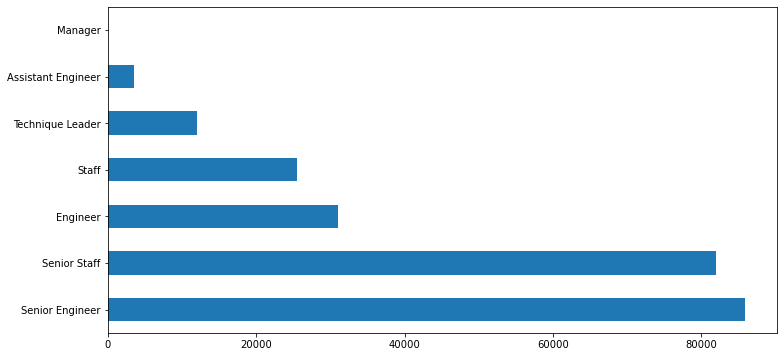

In [51]:

"""
Now lets take a look at it
"""
#current_employees.groupby('title').plot(kind = "barh")

current_employees.title.value_counts().plot(kind = 'barh')


In [52]:
# Join the employees and titles dataframes together.

"""
I first needed to sort titles by cur_date
"""
titles_df = titles_df[titles_df.to_date == titles_df.to_date.max()]

In [53]:
employee_and_title_merge = pd.merge(employees_df, titles_df, left_on='emp_no', right_on='emp_no', how='inner')
employee_and_title_merge

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,Senior Staff,1996-09-12,9999-01-01
...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,Engineer,1997-06-02,9999-01-01
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,Senior Engineer,2002-05-13,9999-01-01
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01


In [54]:
# Visualize how frequently employees change titles.

"""
Since i sorted my previous data frames to solve the previous problem, i decide to make 
some new dataframes to solve my new problems.  That means another SQL search and new
variable names
"""

employees_all_df = pd.DataFrame(pd.read_sql('SELECT * FROM employees', url))
employees_all_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [55]:
titles_all_df = pd.DataFrame(pd.read_sql('SELECT * FROM titles', url))
titles_all_df.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [56]:
"""
Now lets stick them back together
"""
employee_and_title_merge_all = pd.merge(employees_all_df, titles_all_df, left_on='emp_no', right_on='emp_no', how='inner')
employee_and_title_merge_all

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


In [57]:
"""
Sorted by the values I car about
"""
employee_and_title_merge_all.sort_values(by =['emp_no','title'])

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


In [58]:
"""
Now to group it by emp_no to see duplicate titles
"""

#employee_and_title_merge_all.sort_values(by =['emp_no','title']).groupby('emp_no').count()
employee_and_title_merge_all.sort_values(by =['emp_no','title']).groupby('emp_no').title.count()

emp_no
10001     1
10002     1
10003     1
10004     2
10005     2
         ..
499995    1
499996    2
499997    2
499998    2
499999    1
Name: title, Length: 300024, dtype: int64

In [59]:
"""
Now lets make a hist 
"""
emp_no_title_count_df = pd.DataFrame(employee_and_title_merge_all.sort_values(by =['emp_no','title']).groupby('emp_no').title.count())
emp_no_title_count_df


#(kind = 'barh')
#list_to_graph = list(emp_title_counts)
#list_to_graph


,title
emp_no,
10001,1
10002,1
10003,1
10004,2
10005,2
...,...
499995,1
499996,2
499997,2


Text(0, 0.5, '# of Employees')

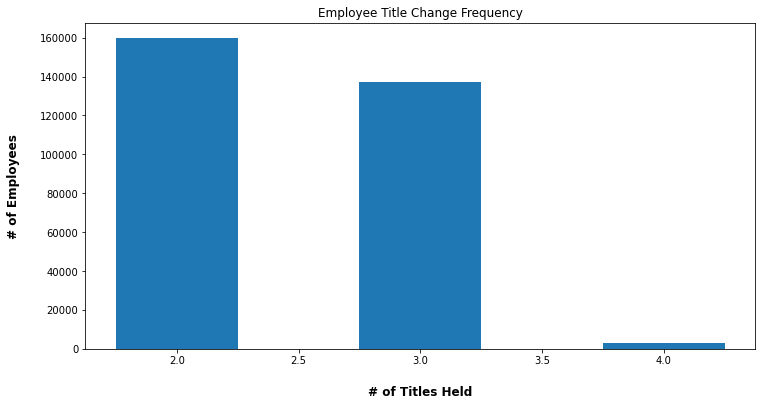

In [60]:
 """
Lets see if it works when i run my column name inside of my hist() method
 """
hist = emp_no_title_count_df.plot.hist(bins = [1,2,3,4], align = "right", rwidth=0.5, legend = False)

hist.set_title("Employee Title Change Frequency")

hist.set_xlabel("# of Titles Held", labelpad=20, weight='bold', size=12)

hist.set_ylabel("# of Employees", labelpad=20, weight='bold', size=12)

In [62]:
# For each title, find the hire date of the employee that was hired most recently with that title.

employee_and_title_merge.sort_values(by=['title', 'hire_date'])

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
2448,13029,1960-12-26,Selwyn,Demke,F,1985-02-02,Assistant Engineer,1998-08-05,9999-01-01
15034,28714,1953-05-04,Arco,Poehlman,M,1985-02-02,Assistant Engineer,1996-11-25,9999-01-01
26450,42942,1952-10-11,Mansur,Bolotov,F,1985-02-03,Assistant Engineer,1998-08-02,9999-01-01
127166,258686,1964-04-08,Tetsushi,Eickenmeyer,M,1985-02-03,Assistant Engineer,1998-08-23,9999-01-01
73817,102048,1963-09-10,Katsuyuki,Boyle,F,1985-02-05,Assistant Engineer,1999-10-30,9999-01-01
...,...,...,...,...,...,...,...,...,...
214480,467839,1960-05-02,Huan,Capobianchi,M,1999-10-21,Technique Leader,1999-10-21,9999-01-01
79151,108697,1963-05-28,Quingbo,Kambil,M,1999-10-30,Technique Leader,1999-10-30,9999-01-01
1365,11697,1957-12-20,JoAnne,Merey,F,1999-11-06,Technique Leader,1999-12-10,9999-01-01
50558,73027,1959-11-28,Arto,Spinelli,M,1999-12-02,Technique Leader,1999-12-02,9999-01-01


In [ ]:
# Write the code necessary to create a cross tabulation of the number of titles by department. 
#  (Hint: this will involve a combination of SQL and python/pandas code)



### 4. Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

In [ ]:
# What is the total price for each order?


In [ ]:
# What are the most popular 3 items?


In [ ]:
# Which item has produced the most revenue?
